<a href="https://colab.research.google.com/github/arina19-2000/unimi/blob/main/tesi/tesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/colab


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/colab


## Data preparation

In [3]:
dfa = pd.read_excel('results adults2.xlsx')

In [4]:
column_types = dfa.dtypes

type_counts = column_types.value_counts()
print("Column types and counts:")
print(type_counts)

Column types and counts:
object     89
float64    20
int64       1
Name: count, dtype: int64


In [5]:
dfa = dfa.dropna(axis=1, how='all')
dfa.shape

(786, 109)

renaming columns to have more managable titles:

In [6]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('italian'))

def remove_italian_stopwords(col):
    col = col.lower()
    col = re.sub(r'[^\w\s]', '', col)
    col = re.sub(r'\s+', '_', col)
    words = [word for word in col.split('_') if word not in stop_words]
    return '_'.join(words)

column_mapping = {col: remove_italian_stopwords(col) for col in dfa.columns}
dfa.columns = [column_mapping[col] for col in dfa.columns]
column_mapping



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'ID risposta': 'id_risposta',
 'Ha uno o più figli adottati nati prima del 2002 (escluso)?': 'figli_adottati_nati_prima_2002_escluso',
 'Numero di figli adottati nati prima del 2002 (escluso) [N°][]': 'numero_figli_adottati_nati_prima_2002_escluso_n',
 'Genere': 'genere',
 'Anno di nascita [Anno di nascita][]': 'anno_nascita_anno_nascita',
 'Adozione': 'adozione',
 'Anno di arrivo in famiglia [Anno][]': 'anno_arrivo_famiglia_anno',
 'Stato di provenienza': 'stato_provenienza',
 'Era scolarizzato nel paese di origine (Italia inclusa)?': 'scolarizzato_paese_origine_italia_inclusa',
 'Età di inserimento a scuola [Età][]': 'età_inserimento_scuola_età',
 'Prima classe di frequenza a scuola': 'prima_classe_frequenza_scuola',
 'Prima classe di frequenza a scuola [Altro]': 'prima_classe_frequenza_scuola_altro',
 'Ha avuto un PDP per BES non certificato (dal 2013)?': 'pdp_bes_certificato_2013',
 'Presenza di patologie certificate ai sensi della L. 104 comma 1 o comma 3 (dal 1992)?': 'presenza_

In [7]:
dfa.head()

,id_risposta,figli_adottati_nati_prima_2002_escluso,numero_figli_adottati_nati_prima_2002_escluso_n,genere,anno_nascita_anno_nascita,adozione,anno_arrivo_famiglia_anno,stato_provenienza,scolarizzato_paese_origine_italia_inclusa,età_inserimento_scuola_età,...,valutazione_voto603,conseguito_laurea_triennale_magistrale3,voto_laurea_voto110,professione_padre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore,padre_mai_stato_organi_collegiali_scuole_propri_figli_no,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_primarie,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_primo_grado,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_secondo_grado,padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori,padre_difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore
0,1,Sì,1.0,Femmina,1999.0,Nazionale,2004.0,Italia,No,5.0,...,NaN,Laurea magistrale o vecchio ordinamento,110.0,programmista,No,No,No,Sì,"Sì, 1 anno",Sì
1,2,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Sì,2.0,Femmina,1990.0,Nazionale,1991.0,Italia,No,6.0,...,NaN,NaN,NaN,Operaio,Sì,No,No,No,NaN,NaN
3,4,Sì,1.0,Femmina,1996.0,Internazionale,2003.0,Ucraina,No,6.0,...,NaN,Laurea magistrale o vecchio ordinamento,110.0,Impiegato,Sì,No,No,No,No,No
4,5,Sì,1.0,Femmina,1996.0,Nazionale,2001.0,Italia,Sì,4.0,...,NaN,NaN,110.0,Assistente sociale,No,No,No,Sì,"Sì, 1 anno",No


In [8]:
dfa = dfa.dropna(thresh=int(0.10 * dfa.shape[1]), axis=0)
dfa.shape

(495, 109)

In [9]:
dfa = dfa.dropna(subset=['qual_titolo_studio_massimo_conseguito'])


In [10]:
# dfa = dfa.dropna(thresh=int(0.02 * dfa.shape[1]), axis=1)
# dfa.shape

In [11]:
dfa = dfa.loc[:, dfa.apply(pd.Series.nunique) > 1]
dfa.shape

(373, 103)

In [12]:
dfa.head()

,id_risposta,numero_figli_adottati_nati_prima_2002_escluso_n,genere,anno_nascita_anno_nascita,adozione,anno_arrivo_famiglia_anno,stato_provenienza,scolarizzato_paese_origine_italia_inclusa,età_inserimento_scuola_età,prima_classe_frequenza_scuola,...,valutazione_voto603,conseguito_laurea_triennale_magistrale3,voto_laurea_voto110,professione_padre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore,padre_mai_stato_organi_collegiali_scuole_propri_figli_no,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_primarie,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_primo_grado,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_secondo_grado,padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori,padre_difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore
2,3,2.0,Femmina,1990.0,Nazionale,1991.0,Italia,No,6.0,Prima elementare,...,NaN,NaN,NaN,Operaio,Sì,No,No,No,NaN,NaN
4,5,1.0,Femmina,1996.0,Nazionale,2001.0,Italia,Sì,4.0,Scuola materna,...,NaN,NaN,110.0,Assistente sociale,No,No,No,Sì,"Sì, 1 anno",No
5,6,1.0,Femmina,1999.0,Internazionale,2014.0,Ucraina,No,6.0,Scuola materna,...,60.0,NaN,NaN,Impiegato statale,Sì,No,No,No,No,No
6,7,2.0,Maschio,1994.0,Nazionale,1994.0,Italia,No,2.0,Asilo nido,...,NaN,NaN,110.0,docente univers,Sì,No,No,No,No,No
7,8,2.0,Maschio,1988.0,Nazionale,1991.0,Italia,Sì,3.0,Scuola materna,...,48.0,NaN,NaN,Impiegato tecnico,Sì,No,No,No,No,No


## Rename column content

In [13]:
dfa['genere_fem'] = dfa['genere'].apply(lambda x: 1 if x == 'Femmina' else 0)
dfa['genere_fem1'] = dfa['genere1'].apply(lambda x: 1 if x == 'Femmina' else 0)
dfa['adozione_int'] = dfa['adozione'].apply(lambda x: 1 if x == 'Internazionale' else 0)
dfa['adozione_int1'] = dfa['adozione1'].apply(lambda x: 1 if x == 'Internazionale' else 0)

<ipython-input-13-55395cd5a736>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['genere_fem'] = dfa['genere'].apply(lambda x: 1 if x == 'Femmina' else 0)
<ipython-input-13-55395cd5a736>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['genere_fem1'] = dfa['genere1'].apply(lambda x: 1 if x == 'Femmina' else 0)
<ipython-input-13-55395cd5a736>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [14]:
dfa['adopt_age'] = dfa['anno_arrivo_famiglia_anno'] - dfa['anno_nascita_anno_nascita']


<ipython-input-14-76d5b41c044a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['adopt_age'] = dfa['anno_arrivo_famiglia_anno'] - dfa['anno_nascita_anno_nascita']


In [15]:
dfa['attualmente_lavora'].value_counts()

,count
attualmente_lavora,
No,195
Sì,155


In [16]:
for col in dfa.columns:
    if isinstance(dfa[col], pd.Series):
        unique_values = dfa[col].dropna().unique()
        if set(unique_values).issubset({'Sì', 'No'}):
            dfa[col] = dfa[col].replace({'Sì': 1, 'No': 0})
dfa.head()

<ipython-input-16-7dd3b04e3963>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfa[col] = dfa[col].replace({'Sì': 1, 'No': 0})
<ipython-input-16-7dd3b04e3963>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa[col] = dfa[col].replace({'Sì': 1, 'No': 0})


,id_risposta,numero_figli_adottati_nati_prima_2002_escluso_n,genere,anno_nascita_anno_nascita,adozione,anno_arrivo_famiglia_anno,stato_provenienza,scolarizzato_paese_origine_italia_inclusa,età_inserimento_scuola_età,prima_classe_frequenza_scuola,...,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_primarie,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_primo_grado,padre_mai_stato_organi_collegiali_scuole_propri_figli_sì_secondaria_secondo_grado,padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori,padre_difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore,genere_fem,genere_fem1,adozione_int,adozione_int1,adopt_age
2,3,2.0,Femmina,1990.0,Nazionale,1991.0,Italia,0.0,6.0,Prima elementare,...,0.0,0.0,0.0,NaN,NaN,1,1,0,0,1.0
4,5,1.0,Femmina,1996.0,Nazionale,2001.0,Italia,1.0,4.0,Scuola materna,...,0.0,0.0,1.0,"Sì, 1 anno",0.0,1,0,0,0,5.0
5,6,1.0,Femmina,1999.0,Internazionale,2014.0,Ucraina,0.0,6.0,Scuola materna,...,0.0,0.0,0.0,No,0.0,1,0,1,0,15.0
6,7,2.0,Maschio,1994.0,Nazionale,1994.0,Italia,0.0,2.0,Asilo nido,...,0.0,0.0,0.0,No,0.0,0,1,0,0,0.0
7,8,2.0,Maschio,1988.0,Nazionale,1991.0,Italia,1.0,3.0,Scuola materna,...,0.0,0.0,0.0,No,0.0,0,1,0,0,3.0


In [17]:
dfa = dfa.drop(columns=['genere','adozione','scuola_secondaria_secondo_grado_superiore_frequentato_altro', 'genere1','adozione1','prima_classe_frequenza_scuola_altro',])

In [18]:
hierarchical_mapping = {
    'Asilo nido': 1,
    'Scuola materna': 2,
    'Scuola d\'infanzia': 3,
    'Prima elementare': 4,
    'Seconda elementare': 5,
    'Terza elementare': 6,
    'Quarta elementare': 7,
    'Prima media': 8,
    'Seconda media': 9,
    'Terza media': 10,
    'Altro': 0
}

dfa['prima_classe_frequenza_scuola'] = dfa['prima_classe_frequenza_scuola'].map(hierarchical_mapping)
dfa['prima_classe_frequenza_scuola1'] = dfa['prima_classe_frequenza_scuola1'].map(hierarchical_mapping)


In [19]:
hierarchical_mapping2 = {
    'No': 0,
    'Sì, 1 anno': 1,
    'Sì, 2 anni': 2,
    'Sì, più di 2 anni': 3,
}

dfa['dovuto_ripetere_anni_superiore'] = dfa['dovuto_ripetere_anni_scuola_secondaria_superiore'].map(hierarchical_mapping2).fillna(99)
dfa['dovuto_ripetere_anni_superiore1'] = dfa['dovuto_ripetere_anni_scuola_secondaria_superiore1'].map(hierarchical_mapping2).fillna(99)
dfa['dovuto_ripetere_anni_superiore2'] = dfa['dovuto_ripetere_anni_scuola_secondaria_superiore2'].map(hierarchical_mapping2).fillna(99)
dfa['dovuto_ripetere_anni_superiore3'] = dfa['dovuto_ripetere_anni_scuola_secondaria_superiore3'].map(hierarchical_mapping2).fillna(99)
dfa['dovuto_ripetere_anni_madre'] = dfa['padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori'].map(hierarchical_mapping2).fillna(99)
dfa['dovuto_ripetere_anni_padre'] = dfa['madre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori'].map(hierarchical_mapping2).fillna(99)
dfa['dovuto_ripetere_anni_corso_formazione'] = dfa['dovuto_ripetere_anni_scuola_professionale_durante_corso_formazione_frequentato'].map(hierarchical_mapping2).fillna(99)

dfa = dfa.drop([
    'dovuto_ripetere_anni_scuola_secondaria_superiore',
    'dovuto_ripetere_anni_scuola_secondaria_superiore1',
    'dovuto_ripetere_anni_scuola_secondaria_superiore2',
    'dovuto_ripetere_anni_scuola_secondaria_superiore3',
    'padre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori',
    'madre_dovuto_ripetere_anni_scuola_secondaria_secondo_grado_superiori',
    'dovuto_ripetere_anni_scuola_professionale_durante_corso_formazione_frequentato'
], axis=1)

In [20]:
dfa['stato_provenienza'] = dfa['stato_provenienza'].str.lower()

In [21]:
dfa['stato_provenienza1'] = dfa['stato_provenienza1'].str.lower()
dfa['stato_provenienza1'].value_counts()

,count
stato_provenienza1,
russia,12
colombia,9
brasile,8
india,7
italia,6
ucraina,4
cambogia,4
romania,3
nepal,3


In [22]:
region_mapping = {
    # Europe
    'italia': 'Italy',
    'russia': 'East Europe',
    'ucraina': 'East Europe',
    'ungheria': 'East Europe',
    'bulgaria': 'East Europe',
    'bielorussia': 'East Europe',
    'romania': 'East Europe',
    'polonia': 'East Europe',
    'lituania': 'East Europe',
    'moldavia': 'East Europe',
    'ukraina': 'East Europe',
    'karelia': 'East Europe',

    # Latin America
    'brasile': 'Latin America',
    'colombia': 'Latin America',
    'bolivia': 'Latin America',
    'perù': 'Latin America',
    'peru': 'Latin America',
    'peru’': 'Latin America',
    'cile': 'Latin America',
    'ecuador': 'Latin America',
    'messico': 'Latin America',
    'guatemala': 'Latin America',
    'america latina': 'Latin America',

    # Asia
    'india': 'Asia',
    'cambogia': 'Asia',
    'nepal': 'Asia',
    'vietnam': 'Asia',
    'cina': 'Asia',
    'sri lanka': 'Asia',
    'filippine': 'Asia',
    'kazakistan': 'Asia',
    'thailandia': 'Asia',
    'thailand': 'Asia',
    'korea': 'Asia',
    'cambigia': 'Asia',
    'brazile': 'Asia',

    # Africa
    'etiopia': 'Africa',
    'madagascar': 'Africa',
    'marocco': 'Africa',
    'kenya': 'Africa',
    'repubblica democratica del congo': 'Africa',
    'costa d\'avorio': 'Africa',
    'burkina faso': 'Africa',
    'mauritania': 'Africa',

    # Other/Unknown
    'other': 'Other',
}

dfa['origin_region'] = dfa['stato_provenienza'].str.lower().map(region_mapping)
dfa['origin_region'].fillna('Other', inplace=True)
dfa[['stato_provenienza', 'origin_region']].head()


<ipython-input-22-4b8ca129f3ed>:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfa['origin_region'].fillna('Other', inplace=True)


,stato_provenienza,origin_region
2,italia,Italy
4,italia,Italy
5,ucraina,East Europe
6,italia,Italy
7,italia,Italy


In [23]:
# Define the mapping for regions based on the country names in 'stato_provenienza1'
region_mapping_1 = {
    'italia': 'Italy',
    'russia': 'East Europe',
    'brasile': 'South America',
    'colombia': 'South America',
    'ucraina': 'East Europe',
    'india': 'Asia',
    'cambogia': 'Asia',
    'etiopia': 'Africa',
    'romania': 'East Europe',
    'ungheria': 'East Europe',
    'nepal': 'Asia',
    'bolivia': 'South America',
    'perù': 'South America',
    'kazakistan': 'Asia',
    'bulgaria': 'East Europe',
    'vietnam': 'Asia',
    'polonia': 'East Europe',
    'ghana': 'Africa',
    'moldavia': 'East Europe',
    'filippine': 'Asia',
    'thailandia': 'Asia',
    'messico': 'South America',
    'costa d\'avorio': 'Africa',
    'mauritania': 'Africa',
    'cile': 'South America',
    'nazionale': 'Italy',
    'rissia': 'East Europe',
    'other': 'Other'
}

dfa['origin_region1'] = dfa['stato_provenienza1'].map(region_mapping_1).fillna('No sibling')
dfa['origin_region1'].value_counts()


,count
origin_region1,
No sibling,293
East Europe,26
South America,25
Asia,18
Italy,7
Africa,4


In [24]:
from sklearn.preprocessing import LabelEncoder

frequency_map = dfa['origin_region'].value_counts().to_dict()
dfa['origin_region'] = dfa['origin_region'].map(frequency_map)

frequency_map2 = dfa['origin_region1'].value_counts().to_dict()
dfa['origin_region1'] = dfa['origin_region1'].map(frequency_map2)

In [25]:
experience_mapping = {
    'Meno impegnativo': 1,
    'Impegnativo nello stesso modo': 2,
    'Più impegnativo': 3
}

column_rename_mapping = {
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_primaria': 'school_experience_primary_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_primaria1': 'school_experience_primary1_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_secondaria_grado1': 'school_experience_secondary_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_secondaria_ii_grado1': 'school_experience_secondary2_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_università1': 'school_experience_university1_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_secondaria_grado': 'school_experience_secondary_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_scuola_secondaria_ii_grado': 'school_experience_secondary2_encoded',
    'secondo_esperienza_percorso_scolastico_tuoa_figlioa_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_figlio_frequentato_scuola_indicata_università': 'school_experience_university_encoded'
}

for old_column, new_column in column_rename_mapping.items():
    dfa[new_column] = dfa[old_column].map(experience_mapping)

dfa.drop(columns=column_rename_mapping.keys(), inplace=True)

In [26]:
region_classification = {
    'Lombardia': 'Northern',
    'Emilia Romagna': 'Northern',
    'Veneto': 'Northern',
    'Piemonte': 'Northern',
    'Liguria': 'Northern',
    'Friuli-Venezia Giulia': 'Northern',
    'Valle d\'Aosta': 'Northern',
    'P.A. Trento': 'Northern',
    'P.A. Bolzano': 'Northern',

    'Toscana': 'Central',
    'Lazio': 'Central',
    'Marche': 'Central',
    'Umbria': 'Central',
    'Abruzzo': 'Central',

    'Puglia': 'Southern',
    'Campania': 'Southern',
    'Sicilia': 'Southern',
    'Sardegna': 'Southern',
    'Calabria': 'Southern',
    'Molise': 'Southern',
    'Basilicata': 'Southern'
}

dfa['region_area_madre'] = dfa['regione_residenza_madre'].map(region_classification)
dfa['region_area_padre'] = dfa['regione_residenza_padre'].map(region_classification)

mother_freq_encoding = dfa['region_area_madre'].value_counts(normalize=False)
dfa['region_area_madre_freq_encoded'] = dfa['region_area_madre'].map(mother_freq_encoding)

father_freq_encoding = dfa['region_area_padre'].value_counts(normalize=False)
dfa['region_area_padre_freq_encoded'] = dfa['region_area_padre'].map(father_freq_encoding)

1. Nessun titolo/Licenza elementare o frequentazione della sola scuola primaria
2. Licenza di scuola secondaria di primo grado (precedentemente denominata licenza media inferiore)
3. Titolo di diploma di qualifica professionale che non permette l’accesso all’università (3 o 4 anni)
4. Titolo di scuola secondaria di secondo grado (denominata precedentemente scuola superiore) che permette l’iscrizione all’università (5 anni)
5. Titolo post-secondario non terziario (IFTS)
6. Titolo di studio universitario
7. Titolo di studio post-universitario (Master, Scuola di perfezionamento, ecc.)
8. Dottorato di ricerca

In [27]:
dfa['scuola_professionale_corso_formazione_professionale_frequentato'] = dfa['scuola_professionale_corso_formazione_professionale_frequentato'].notna().astype(int)


In [28]:
maps = {
    '1. Liceo': 1,
    '2. Istituto tecnico': 2,
    '3. Istituto professionale': 3,
    'Altro': 4
}

dfa['scuola_secondaria_secondo_grado_superiore_frequentato'] = dfa['scuola_secondaria_secondo_grado_superiore_frequentato'].map(maps).fillna(0)
dfa['scuola_secondaria_secondo_grado_superiore_frequentato1'] = dfa['scuola_secondaria_secondo_grado_superiore_frequentato1'].map(maps).fillna(0)

In [29]:
dfa['scuola_secondaria_secondo_grado_superiore_frequentato'].value_counts()

,count
scuola_secondaria_secondo_grado_superiore_frequentato,
0.0,147
1.0,108
2.0,52
3.0,48
4.0,18


In [30]:
dfa['qual_titolo_studio_massimo_conseguito'].value_counts()

,count
qual_titolo_studio_massimo_conseguito,
4.\tTitolo di scuola secondaria di secondo grado (denominata precedentemente scuola superiore) che permette l’iscrizione all’università (5 anni),226
3.\tTitolo di diploma di qualifica professionale che non permette l’accesso all’università (3 o 4 anni),50
6.\tTitolo di studio universitario,43
2.\tLicenza di scuola secondaria di primo grado (precedentemente denominata licenza media inferiore),34
5.\tTitolo post-secondario non terziario (IFTS),10
"7.\tTitolo di studio post-universitario (Master, Scuola di perfezionamento, ecc.)",9
1.\tNessun titolo/Licenza elementare o frequentazione della sola scuola primaria,1


In [31]:
mapping = {
    '1.\tNessun titolo/Licenza elementare o frequentazione della sola scuola primaria': 0.5,
    '2.\tLicenza di scuola secondaria di primo grado (precedentemente denominata licenza media inferiore)': 1,
    '3.\tTitolo di diploma di qualifica professionale che non permette l’accesso all’università (3 o 4 anni)': 2,
    '4.\tTitolo di scuola secondaria di secondo grado (denominata precedentemente scuola superiore) che permette l’iscrizione all’università (5 anni)': 3,
    '5.\tTitolo post-secondario non terziario (IFTS)': 4,
    '6.\tTitolo di studio universitario': 5,
    '7.\tTitolo di studio post-universitario (Master, Scuola di perfezionamento, ecc.)': 6,
    '8.\tDottorato di ricerca': 7,
}

for col in ['qual_titolo_studio_massimo_conseguito', 'qual_titolo_studio_massimo_conseguito1',
            'qual_titolo_studio_massimo_conseguito_madre', 'qual_titolo_studio_massimo_conseguito_padre']:

    dfa[col] = dfa[col].map(mapping)




In [32]:
dfa['qual_titolo_studio_massimo_conseguito'].value_counts()

,count
qual_titolo_studio_massimo_conseguito,
3.0,226
2.0,50
5.0,43
1.0,34
4.0,10
6.0,9
0.5,1


In [33]:
print(dfa.columns.tolist())


['id_risposta', 'numero_figli_adottati_nati_prima_2002_escluso_n', 'anno_nascita_anno_nascita', 'anno_arrivo_famiglia_anno', 'stato_provenienza', 'scolarizzato_paese_origine_italia_inclusa', 'età_inserimento_scuola_età', 'prima_classe_frequenza_scuola', 'pdp_bes_certificato_2013', 'presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992', 'presenza_certificazione_sensi_l170_2010', 'qual_titolo_studio_massimo_conseguito', 'valutazione_voto60', 'valutazione_voto100', 'scuola_secondaria_secondo_grado_superiore_frequentato', 'difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore', 'fatto_anni_istruzione_universitaria_afam_senza_conseguire_titolo', 'conseguito_laurea_triennale_magistrale', 'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc', 'valutazione_laurea_voto110', 'attualmente_lavora', 'lavoro_fa', 'già_indipendenza_economica', 'età_conquistato_indipendenza_economica_anni', 'fatto_esperienze_allestero',

In [34]:
education_mapping = {
    'Scuola secondaria di primo grado': 2,
    'Istituto di formazione professionale che non permette l’accesso all’università 6 Istituto post-secondario non terziario (IFTS)':4,
    'Scuola secondaria di secondo grado che permette l’iscrizione all’università (5 anni)': 3,
    'Titolo post-secondario non terziario (IFTS)': 4,
    'Università': 5,
    'Master, Scuola di perfezionamento, ecc.': 6
}

# dfa['attualmente_frequentando_enc'] = dfa['attualmente_frequentando'].map(education_mapping).fillna(0)
dfa['attualmente_frequentando_enc1'] = dfa['attualmente_frequentando1'].map(education_mapping).fillna(0)
dfa = dfa.drop(columns=['attualmente_frequentando1'])

In [35]:
hierarchical_mapping3 = {
    'Laurea triennale': 5,
    'Laurea magistrale': 6,
}
dfa['conseguito_laurea_triennale_magistrale'] = dfa['conseguito_laurea_triennale_magistrale'].map(hierarchical_mapping3).fillna(0)
dfa['conseguito_laurea_triennale_magistrale1'] = dfa['conseguito_laurea_triennale_magistrale1'].map(hierarchical_mapping3).fillna(0)
dfa['conseguito_laurea_triennale_magistrale2'] = dfa['conseguito_laurea_triennale_magistrale2'].map(hierarchical_mapping3).fillna(0)
dfa['conseguito_laurea_triennale_magistrale3'] = dfa['conseguito_laurea_triennale_magistrale3'].map(hierarchical_mapping3).fillna(0)

In [36]:
dfa['descrizione_nucleo_familiare_figlio'].value_counts()

,count
descrizione_nucleo_familiare_figlio,
Vive con i genitori,266
Vive in coppia con il partner,28
Vive da solo,27
Altro,25
Vive con partner e figli,19
Vive da solo ma ha figli,3


In [37]:
frequency_encoding = dfa['descrizione_nucleo_familiare_figlio'].value_counts()

dfa['descrizione_nucleo_familiare_figlio_encoded'] = dfa['descrizione_nucleo_familiare_figlio'].map(frequency_encoding)
dfa['descrizione_nucleo_familiare_figlio_encoded1'] = dfa['descrizione_nucleo_familiare_figlio1'].map(frequency_encoding)
dfa = dfa.drop(columns=['descrizione_nucleo_familiare_figlio','descrizione_nucleo_familiare_figlio1'])

In [38]:
dfa['fatto_esperienze_allestero'] = dfa['fatto_esperienze_allestero'].replace('No', 0).fillna(0)
dfa['fatto_esperienze_allestero'] = dfa['fatto_esperienze_allestero'].apply(lambda x: 1 if x is not None and x != 0 else x)
dfa['fatto_esperienze_allestero'] = dfa['fatto_esperienze_allestero'].astype(int)

dfa['fatto_esperienze_allestero1'] = dfa['fatto_esperienze_allestero1'].replace('No', 0).fillna(0)
dfa['fatto_esperienze_allestero1'] = dfa['fatto_esperienze_allestero1'].apply(lambda x: 1 if x is not None and x != 0 else x)
dfa['fatto_esperienze_allestero1'] = dfa['fatto_esperienze_allestero1'].astype(int)

In [39]:
# dfa['left_school_cause_difficult'] = dfa['lasciato'].fillna(0).where(dfa['lasciato'].isna(), 1)
# dfa['left_school_cause_difficult1'] = dfa['lasciato1'].fillna(0).where(dfa['lasciato1'].isna(), 1)
# dfa = dfa.drop(columns=['lasciato', 'lasciato1'])


In [40]:
voto_columns = dfa.columns[dfa.columns.str.contains('voto|anno')].unique()
for col in voto_columns:
    dfa[col] = dfa[col].fillna(0)

In [41]:
duplicate_columns = dfa.columns[dfa.columns.duplicated()].tolist()
print(duplicate_columns)

['età_inserimento_scuola_età', 'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc', 'voto_laurea_voto110']


In [42]:
dfa.columns = pd.Series(dfa.columns).apply(lambda x: x + '_1' if x in dfa.columns[dfa.columns.duplicated()].tolist() else x)
duplicate_columns = dfa.columns[dfa.columns.duplicated()].tolist()
print("Updated Columns (Duplicates should be empty):", duplicate_columns)

Updated Columns (Duplicates should be empty): ['età_inserimento_scuola_età_1', 'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc_1', 'voto_laurea_voto110_1']


In [43]:
non_numeric_columns = dfa.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['stato_provenienza',
       'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc_1',
       'lavoro_fa', 'stato_provenienza1', 'lasciato', 'lasciato_altro',
       'tipologia_cambio', 'tipologia_cambio1', 'lasciato1',
       'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc_1',
       'lavoro_fa1', 'descrizione_nucleo_familiare_figlio_altro',
       'regione_residenza_madre',
       'professione_madre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore',
       'regione_residenza_padre',
       'professione_padre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore',
       'region_area_madre', 'region_area_padre'],
      dtype='object')


In [44]:
dfa = dfa.drop(columns=['stato_provenienza',
       'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc_1',
       'lavoro_fa', 'stato_provenienza1', 'lasciato', 'lasciato_altro',
       'tipologia_cambio', 'tipologia_cambio1', 'lasciato1',
       'ambito_titolo_universitario_es_economia_giurispudenza_medicina_etc_1',
       'lavoro_fa1', 'descrizione_nucleo_familiare_figlio_altro',
       'regione_residenza_madre',
       'professione_madre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore',
       'regione_residenza_padre',
       'professione_padre_quando_figlio_fatto_scelta_scuola_secondaria_ii_grado_superiore',
       'region_area_madre', 'region_area_padre'
])

In [45]:
dfa = dfa.drop(dfa[dfa['id_risposta'] == 14].index)

In [46]:
dfa['sibling_adopt_yes'] = (dfa['numero_figli_adottati_nati_prima_2002_escluso_n'] > 1).astype(int)

print(dfa[['numero_figli_adottati_nati_prima_2002_escluso_n', 'sibling_adopt_yes']].head())

   numero_figli_adottati_nati_prima_2002_escluso_n  sibling_adopt_yes
2                                              2.0                  1
4                                              1.0                  0
5                                              1.0                  0
6                                              2.0                  1
7                                              2.0                  1


In [47]:
dfa.head()

,id_risposta,numero_figli_adottati_nati_prima_2002_escluso_n,anno_nascita_anno_nascita,anno_arrivo_famiglia_anno,scolarizzato_paese_origine_italia_inclusa,età_inserimento_scuola_età_1,prima_classe_frequenza_scuola,pdp_bes_certificato_2013,presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,presenza_certificazione_sensi_l170_2010,...,school_experience_secondary_encoded,school_experience_secondary2_encoded,school_experience_university1_encoded,school_experience_university_encoded,region_area_madre_freq_encoded,region_area_padre_freq_encoded,attualmente_frequentando_enc1,descrizione_nucleo_familiare_figlio_encoded,descrizione_nucleo_familiare_figlio_encoded1,sibling_adopt_yes
2,3,2.0,1990.0,1991.0,0.0,6.0,4.0,0.0,0.0,0.0,...,3.0,3.0,NaN,3.0,242.0,236.0,0.0,19.0,28.0,1
4,5,1.0,1996.0,2001.0,1.0,4.0,2.0,0.0,0.0,1.0,...,3.0,3.0,NaN,NaN,30.0,32.0,0.0,266.0,NaN,0
5,6,1.0,1999.0,2014.0,0.0,6.0,2.0,0.0,0.0,1.0,...,3.0,3.0,NaN,NaN,30.0,32.0,0.0,266.0,NaN,0
6,7,2.0,1994.0,1994.0,0.0,2.0,1.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,30.0,32.0,5.0,28.0,266.0,1
7,8,2.0,1988.0,1991.0,1.0,3.0,2.0,0.0,0.0,0.0,...,3.0,3.0,2.0,NaN,242.0,236.0,0.0,27.0,28.0,1


In [48]:
dfa_test = dfa[[
    # "età_inserimento_scuola_età",
    "adopt_age",
    "scolarizzato_paese_origine_italia_inclusa",
    "presenza_certificazione_sensi_l170_2010",
    # "difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scuola_secondaria_secondo_grado_superiore",
    # "fatto_anni_istruzione_universitaria_afam_senza_conseguire_titolo",
    # "già_indipendenza_economica",
    "attualmente_lavora",
    # "qual_titolo_studio_massimo_conseguito_madre",
    # "qual_titolo_studio_massimo_conseguito_padre",
    "presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992",
    # "descrizione_nucleo_familiare_figlio_encoded",
    'sibling_adopt_yes',
    # "difficoltà_rendimentoapprendimento_spinto_cambiare_tipologia_indirizzo_scolastico",
    "fatto_esperienze_allestero",
    "genere_fem",
    'school_experience_secondary_encoded',
    # 'school_experience_primary_encoded',
    'prima_classe_frequenza_scuola',
    # 'origin_region',
    'dovuto_ripetere_anni_padre',
    'dovuto_ripetere_anni_madre',
    'dovuto_ripetere_anni_superiore',
    'adozione_int',
    # "valutazione_voto60",
    # "valutazione_voto100",
    'qual_titolo_studio_massimo_conseguito']].fillna(99)

In [49]:
dfa_test_log = np.log1p(dfa_test)
dfa_test_log.describe()

,adopt_age,scolarizzato_paese_origine_italia_inclusa,presenza_certificazione_sensi_l170_2010,attualmente_lavora,presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,sibling_adopt_yes,fatto_esperienze_allestero,genere_fem,school_experience_secondary_encoded,prima_classe_frequenza_scuola,dovuto_ripetere_anni_padre,dovuto_ripetere_anni_madre,dovuto_ripetere_anni_superiore,adozione_int,qual_titolo_studio_massimo_conseguito
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1.572890,1.045820,0.795458,0.572002,0.349667,0.178397,0.152381,0.299187,1.365604,1.384773,1.031532,1.231580,1.991245,0.548200,1.348147
std,0.797570,1.709777,1.621855,1.087817,1.088973,0.303442,0.287444,0.343780,0.614163,0.640783,1.877635,1.950102,2.155791,0.282266,0.289969
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.405465
25%,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,1.098612,0.000000,0.000000,0.000000,0.693147,1.386294
50%,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,1.386294,0.000000,0.000000,0.693147,0.693147,1.386294
75%,2.197225,0.693147,0.693147,0.693147,0.000000,0.693147,0.000000,0.693147,1.386294,1.609438,0.693147,1.386294,4.605170,0.693147,1.386294
max,3.713572,4.605170,4.605170,4.605170,4.605170,0.693147,0.693147,0.693147,4.605170,4.605170,4.605170,4.605170,4.605170,0.693147,1.945910


In [50]:
dfa_test_log.isna().sum()

,0
adopt_age,0
scolarizzato_paese_origine_italia_inclusa,0
presenza_certificazione_sensi_l170_2010,0
attualmente_lavora,0
presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,0
sibling_adopt_yes,0
fatto_esperienze_allestero,0
genere_fem,0
school_experience_secondary_encoded,0
prima_classe_frequenza_scuola,0


In [51]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.6 MB/s eta 0:00:00


In [52]:
import pingouin as pg

mardia_results = pg.multivariate_normality(dfa_test_log, alpha=0.05)
print(mardia_results)

HZResults(hz=3.285835088108075, pval=0.0, normal=False)


In [53]:
dfa_test_log.kurt()

,0
adopt_age,-0.369749
scolarizzato_paese_origine_italia_inclusa,0.539348
presenza_certificazione_sensi_l170_2010,1.674608
attualmente_lavora,8.889218
presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992,11.001642
sibling_adopt_yes,-0.762148
fatto_esperienze_allestero,-0.155466
genere_fem,-1.933575
school_experience_secondary_encoded,22.406168
prima_classe_frequenza_scuola,10.281962


In [54]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = dfa_test_log.drop(columns=['qual_titolo_studio_massimo_conseguito'])
y = dfa_test_log['qual_titolo_studio_massimo_conseguito']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y, X)

results = model.fit(cov_type='HC3')

print(results.summary())


                                          OLS Regression Results                                          
Dep. Variable:     qual_titolo_studio_massimo_conseguito   R-squared (uncentered):                   0.917
Model:                                               OLS   Adj. R-squared (uncentered):              0.914
Method:                                    Least Squares   F-statistic:                              434.3
Date:                                   Sat, 11 Jan 2025   Prob (F-statistic):                   3.33e-215
Time:                                           22:37:44   Log-Likelihood:                         -185.21
No. Observations:                                    373   AIC:                                      398.4
Df Residuals:                                        359   BIC:                                      453.3
Df Model:                                             14                                                  
Covariance Type:                     

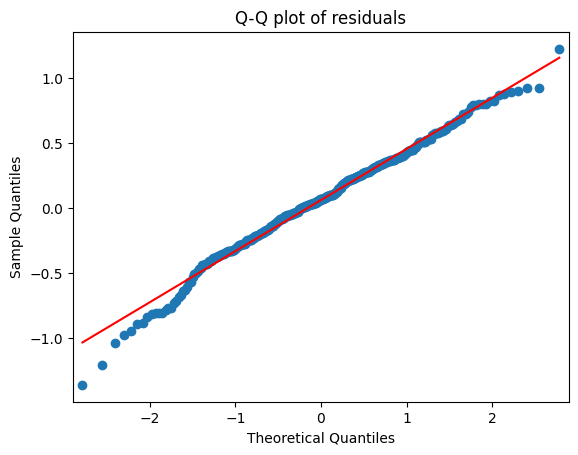

In [55]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
residuals = results.resid

# Create a Q-Q plot for the residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q plot of residuals')
plt.show()

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_train_vif = add_constant(X_train)
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
print(vif_data)

                                             Variable        VIF
0                                               const  23.846067
1                                           adopt_age   1.599865
2           scolarizzato_paese_origine_italia_inclusa   1.822997
3             presenza_certificazione_sensi_l170_2010   1.326270
4                                  attualmente_lavora   1.118896
5   presenza_patologie_certificate_sensi_104_comma...   1.337564
6                                   sibling_adopt_yes   1.065595
7                          fatto_esperienze_allestero   1.037409
8                                          genere_fem   1.056245
9                 school_experience_secondary_encoded   1.116239
10                      prima_classe_frequenza_scuola   1.181611
11                         dovuto_ripetere_anni_padre   1.243130
12                         dovuto_ripetere_anni_madre   1.289488
13                     dovuto_ripetere_anni_superiore   1.086491
14                       

In [57]:
dfa_test['dovuto_ripetere_anni_madre'].value_counts()

,count
dovuto_ripetere_anni_madre,
0.0,235
99.0,92
1.0,38
2.0,6
3.0,2


In [58]:
dfa_test['dovuto_ripetere_anni_padre'].value_counts()

,count
dovuto_ripetere_anni_padre,
0.0,270
99.0,80
1.0,22
2.0,1


In [ ]:
# ordinal logit

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel

X = dfa_test_log.drop(columns=['qual_titolo_studio_massimo_conseguito'])
y = dfa_test_log['qual_titolo_studio_massimo_conseguito']

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the ordinal logistic regression model
model = OrderedModel(y_train, X_train, distr='logit')
results = model.fit(maxiter = 10000) #start_params=None,

# Show the summary of the regression
print(results.summary())


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data["Tolerance"] = 1 / vif_data["VIF"]
vif_data


## EDA

In [ ]:
pd.crosstab(index=dfa_test['qual_titolo_studio_massimo_conseguito'], columns=dfa_test['genere_fem'], margins=True)


In [ ]:
pd.crosstab(index=dfa_test['genere_fem'], columns=[dfa_test['presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992'], dfa_test['presenza_certificazione_sensi_l170_2010']], margins=True)



## SEM Attempt

**Key Observations:**

Strong Positive Covariance:

dovuto_ripetere_anni_padre and dovuto_ripetere_anni_madre: Covariance = 1.376, indicating that these variables likely increase together.
presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992 and presenza_certificazione_sensi_l170_2010: Covariance = 0.818, reflecting a strong association between these two conditions.
Negative Covariance:

adopt_age and scolarizzato_paese_origine_italia_inclusa: Covariance = -0.627, suggesting an inverse relationship.
Minimal Covariance:

pdf_values with all variables has near-zero covariance, suggesting it does not vary significantly with other variables.

In [ ]:
dfa_test_log.cov()

In [ ]:
!pip install semopy

In [ ]:
from semopy import Model

desc = """
family =~ sibling_adopt_yes + dovuto_ripetere_anni_padre + dovuto_ripetere_anni_madre
personal =~ adopt_age + genere_fem + adozione_int + prima_classe_frequenza_scuola
learning_diff =~ dovuto_ripetere_anni_superiore + presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992 + presenza_certificazione_sensi_l170_2010
qual_titolo_studio_massimo_conseguito ~ personal + family +learning_diff

adopt_age ~~ prima_classe_frequenza_scuola


# genere_fem ~~ presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992
# genere_fem ~~ presenza_certificazione_sensi_l170_2010
# qual_titolo_studio_massimo_conseguito ~~ adopt_age
# qual_titolo_studio_massimo_conseguito ~~ adozione_int

"""

model = Model(desc)
model.fit(dfa_test_log, obj="MLW", solver="SLSQP")
model.inspect()


In [ ]:
semopy.calc_stats(model)

In [ ]:
from semopy import semplot
semplot(model, filename='t.pdf')


### MCA


In [ ]:
dfa_test

In [ ]:
binary_columns = [
    'scolarizzato_paese_origine_italia_inclusa',
    'presenza_certificazione_sensi_l170_2010',
    'attualmente_lavora',
    'presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992',
    'sibling_adopt_yes',
    'fatto_esperienze_allestero',
    'genere_fem',
    'adozione_int'
]
for col in binary_columns:
    dfa_test[col] = dfa_test[col].astype('category')

In [ ]:
!pip install prince


In [ ]:
import prince
independent_columns = dfa_test.columns.difference(['adopt_age','qual_titolo_studio_massimo_conseguito','dovuto_ripetere_anni_padre','dovuto_ripetere_anni_madre','fatto_esperienze_allestero','scolarizzato_paese_origine_italia_inclusa'])
mca_df = dfa_test[independent_columns]
mca = prince.MCA(n_components=2, random_state=42)

mca = mca.fit(mca_df)

mca_result = mca.transform(mca_df)

In [ ]:
mca_df

In [ ]:
mca = prince.MCA(n_components=9, engine='sklearn',random_state=42)
mca = mca.fit(mca_df)

In [ ]:
mca.eigenvalues_summary


In [ ]:
ax = mca.plot(dfa_test)
ax

##Children survey results

In [ ]:
dfc = pd.read_excel('results kids.xlsx')

In [ ]:
dfc.shape

In [ ]:
dfc = dfc.dropna(axis=1, how='all')
dfc.shape

In [ ]:
dfc = dfc.dropna(thresh=int(0.10 * dfc.shape[1]), axis=0)
dfc.shape

In [ ]:
dfc = dfc.loc[:, dfc.apply(pd.Series.nunique) > 1]
dfc.shape

In [ ]:
column_types = dfc.dtypes

type_counts = column_types.value_counts()
print("Column types and counts:")
print(type_counts)

In [ ]:
stop_words = set(stopwords.words('italian'))

def remove_italian_stopwords(col):
    col = col.lower()
    col = re.sub(r'[^\w\s]', '', col)
    col = re.sub(r'\s+', '_', col)
    words = [word for word in col.split('_') if word not in stop_words]
    return '_'.join(words)

column_mapping = {col: remove_italian_stopwords(col) for col in dfc.columns}
dfc.columns = [column_mapping[col] for col in dfc.columns]
column_mapping

In [ ]:
dfc = dfc.iloc[:, 10:]

In [ ]:
dfc = dfc.dropna(subset=['g2q00014_concluso_percorso_istruzione_formazione'])


In [ ]:
dfc.head()

In [ ]:
dfc['genere'] = dfc['g2q00001_genere'].apply(lambda x: 1 if x == 'Femmina' else 0)
dfc['adozione_int'] = dfc['g2q00003_adozione'].apply(lambda x: 1 if x == 'Internazionale' else 0)
dfc['adopt_age'] = dfc['g2q00004sq001_sq001_anno_arrivo_famiglia_anno'] - dfc['g2q00002sq001_sq001_anno_nascita_anno_nascita']
dfc = dfc.drop(['g2q00001_genere', 'g2q00003_adozione'], axis=1)


In [ ]:
for col in dfc.columns:
    if isinstance(dfc[col], pd.Series):
        unique_values = dfc[col].dropna().unique()
        if set(unique_values).issubset({'Sì', 'No'}):
            dfc[col] = dfc[col].replace({'Sì': 1, 'No': 0})
dfc.head()

In [ ]:
dfc['g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992'].isna().sum()


In [ ]:
dfc.isna().sum().sort_values(ascending=False)


In [ ]:
dfc = dfc.dropna(thresh=len(dfc) - 100, axis=1)

In [ ]:
numeric_columns = dfc.select_dtypes(exclude=['object']).columns

# Columns without 'voto' in their name - fill NaNs with 99
columns_to_replace_99 = [col for col in numeric_columns if 'voto' not in col]
dfc.loc[:, columns_to_replace_99] = dfc[columns_to_replace_99].fillna(99)

# Columns with 'voto' in their name - fill NaNs with 0
columns_to_replace_0 = [col for col in numeric_columns if 'voto' in col]
dfc.loc[:, columns_to_replace_0] = dfc[columns_to_replace_0].fillna(0)

In [ ]:
dfc.loc[:,'g2q00035sq001_sq001_età_conquistato_indipendenza_economica_anni'] = dfc['g2q00035sq001_sq001_età_conquistato_indipendenza_economica_anni'].fillna(0)

In [ ]:
dfc.g2q00015_qual_titolo_studio_massimo_conseguito.value_counts()

In [ ]:
hierarchical_mapping = {
    'Asilo nido': 1,
    'Scuola materna': 2,
    'Scuola d\'infanzia': 3,
    'Prima elementare': 4,
    'Seconda elementare': 5,
    'Terza elementare': 6,
    'Quarta elementare': 7,
    'Prima media': 8,
    'Seconda media': 9,
    'Terza media': 10,
    'Altro': 0
}

dfc.loc[:, 'prima_classe_frequenza_scuola'] = dfc['g2q00010_prima_classe_frequenza_scuola'].map(hierarchical_mapping)


In [ ]:
mapping = {
    '1.\tNessun titolo/Licenza elementare o frequentazione della sola scuola primaria': 0.5,
    '2.\tLicenza di scuola secondaria di primo grado (precedentemente denominata licenza media inferiore)': 1,
    '3.\tTitolo di diploma di qualifica professionale che non permette l’accesso all’università (3 o 4 anni)': 2,
    '4.\tTitolo di scuola secondaria di secondo grado (denominata precedentemente scuola superiore) che permette l’iscrizione all’università (5 anni)': 3,
    '5.\tTitolo post-secondario non terziario (IFTS)': 4,
    '6.\tTitolo di studio universitario': 5,
    '7.\tTitolo di studio post-universitario (Master, Scuola di perfezionamento, ecc.)': 6,
    '8.\tDottorato di ricerca': 7,
}

for col in ['g2q00015_qual_titolo_studio_massimo_conseguito','g8q00002_qual_titolo_studio_massimo_conseguito_padre','g7q00002_qual_titolo_studio_massimo_conseguito_madre']:
  dfc[col] = dfc[col].map(mapping)


In [ ]:
ierarchical_mapping = {
    'Peggiori': 0,
    'Uguali': 1,
    'Migliori': 2,
    'Non so': 99 }

dfc.loc[:, 'prospettive_economiche_rispetto_genitori_sonosaranno_encoded'] = dfc['g2q00039_pensi_prospettive_economiche_rispetto_genitori_sonosaranno'].map(hierarchical_mapping)


In [ ]:
encoding_mapping = {
    'Impegnativo nello stesso modo': 0,
    'Più impegnativo': 1,
    'Meno impegnativo': 2
}

columns_to_encode = [
    'g2q00038sq004_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_università',
    'g2q00038sq003_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_scuola_secondaria_ii_grado',
    'g2q00038sq001_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_scuola_primaria'
]

for col in columns_to_encode:
    dfc[col] = dfc[col].map(encoding_mapping)

column_mapping = {
    'g2q00038sq004_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_università': 'esperienza_uni',
    'g2q00038sq003_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_scuola_secondaria_ii_grado': 'esperienza_ss',
    'g2q00038sq001_secondo_esperienza_percorso_scolastico_rispetto_compagni_classe_adottati_riguarda_rapporto_impegnorisultati_stato_indicare_nessuna_risposta_frequentato_scuola_indicata_scuola_primaria': 'esperienza_sp'
}

dfc.rename(columns=column_mapping, inplace=True)


In [ ]:
dfc = dfc.dropna(subset=['g2q00015_qual_titolo_studio_massimo_conseguito'])

# g2q00011_pdp_bes_certificato_2013	g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992	g2q00013_presenza_certificazione_sensi_l170_2010

In [ ]:
dfc_test = dfc[[
    'genere',
    'adozione_int',
    "adopt_age",
    'prima_classe_frequenza_scuola',
    # 'g2q00011_pdp_bes_certificato_2013',
    'g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992',
    'g2q00013_presenza_certificazione_sensi_l170_2010',
    # "g2q00035sq001_sq001_età_conquistato_indipendenza_economica_anni",
    # "g2q00036_fatto_esperienze_allestero",
    # 'prospettive_economiche_rispetto_genitori_sonosaranno_encoded',
    # 'esperienza_uni',
    'esperienza_ss',
    'esperienza_sp',
    # 'g8q00002_qual_titolo_studio_massimo_conseguito_padre',
    'g7q00002_qual_titolo_studio_massimo_conseguito_madre',
    'g2q00015_qual_titolo_studio_massimo_conseguito']].fillna(99)

In [ ]:
dfc_test.head()

In [ ]:
dfc_test['adopt_age'] = dfc_test['adopt_age'].replace(-1, 0)

In [ ]:
dfc_test_log = np.log1p(dfc_test)
dfc_test_log.describe()

In [ ]:
dfc_test_log.isna().sum()

In [ ]:
mardia_results = pg.multivariate_normality(dfc_test_log, alpha=0.05)

print(mardia_results)

In [ ]:
X = dfc_test_log.drop(columns=['g2q00015_qual_titolo_studio_massimo_conseguito'])
y = dfc_test_log['g2q00015_qual_titolo_studio_massimo_conseguito']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y, X)

results = model.fit(cov_type='HC3')

print(results.summary())

In [ ]:
residuals = results.resid

# Create a Q-Q plot for the residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q plot of residuals')
plt.show()

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data["Tolerance"] = 1 / vif_data["VIF"]
vif_data


In [ ]:
for col in dfc_test:
    dfc_test[col] = np.ceil(dfc_test[col]).astype(int)

dfc_test.head()

SEM

In [ ]:
    'genere',
    'adozione_int',
    "adopt_age",
    'prima_classe_frequenza_scuola',
    'g2q00011_pdp_bes_certificato_2013',
    'g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992',
    'g2q00013_presenza_certificazione_sensi_l170_2010',
    "g2q00035sq001_sq001_età_conquistato_indipendenza_economica_anni",
    # "g2q00036_fatto_esperienze_allestero",
    # 'prospettive_economiche_rispetto_genitori_sonosaranno_encoded',
    # 'esperienza_uni',
    'esperienza_ss',
    'esperienza_sp',
    # 'g8q00002_qual_titolo_studio_massimo_conseguito_padre',
    'g7q00002_qual_titolo_studio_massimo_conseguito_madre',
    'g2q00015_qual_titolo_studio_massimo_conseguito'

In [ ]:
import semopy
from semopy import Model

desc = """
personal =~ genere + adopt_age + adozione_int
school_exp =~ esperienza_sp + esperienza_ss + prima_classe_frequenza_scuola
learning_diff =~ g2q00012_presenza_patologie_certificate_sensi_104_comma_1_comma_3_1992 + g2q00013_presenza_certificazione_sensi_l170_2010
esperienza_sp ~~ esperienza_ss
school_exp ~ personal + learning_diff

g2q00015_qual_titolo_studio_massimo_conseguito ~ personal + school_exp +learning_diff

"""
# + g2q00013_presenza_certificazione_sensi_l170_2010, family =~ g7q00002_qual_titolo_studio_massimo_conseguito_madre
# g2q00015_qual_titolo_studio_massimo_conseguito ~ adopt_age + genere

model = Model(desc)
model.fit(dfc_test_log, obj="MLW", solver="SLSQP")
model.inspect()


In [ ]:
g = semopy.semplot(model, filename='t2.pdf')
semplot(model, filename='t2.pdf')

In [ ]:
print(g)

In [ ]:
semopy.report(model, "Children Survey")

In [ ]:
from semopy import calc_stats
stats = calc_stats(model)
print(stats)

In [ ]:
import seaborn as sns

correlation_matrix = dfc_test_log.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.figure(figsize=(12, 10))
plt.show()
#bes, madre, padre, esperienza ss/sp

In [ ]:
# factor_scores = model.predict_factors(dfc_test_log)


##MCA 2

In [ ]:
dfc_test.head()

In [ ]:
import prince
independent_columns = dfc_test.columns.difference(['adopt_age','g2q00015_qual_titolo_studio_massimo_conseguito'])
mca_df = dfc_test[independent_columns]
mca = prince.MCA(n_components=4, random_state=42)

mca = mca.fit(mca_df)

mca_result = mca.transform(mca_df)

In [ ]:
eigenvalues = mca.eigenvalues_summary
eigenvalues

In [ ]:
ax = mca.plot(dfc_test)
ax

## OTHER
